# Análisis de Retornos y Riesgos



---

## I. Retornos

### 1. Retorno simple

El retorno simple mide el cambio porcentual en el precio de un activo entre dos momentos consecutivos en el tiempo. Se expresa como:

$$
r_t = \frac{P_{t+1} - P_t}{P_t} = \frac{P_{t+1}}{P_t} - 1
$$

Donde:
- $P_t$ es el precio en el momento $t$.
- $r_t$ es el retorno simple entre $t$ y $t+1$.


### 2. Retorno compuesto

Cuando evaluamos el desempeño de un activo en un período mayor a una unidad de tiempo (por ejemplo, varios días, semanas o meses), utilizamos el **retorno compuesto**:

$$
R_{t,t+k} = \prod_{i=1}^{k}(1 + r_{t+i-1}) - 1
$$

Este retorno tiene en cuenta el efecto acumulativo de los rendimientos a lo largo del tiempo.

> *Si el retorno es constante en cada periodo, el retorno compuesto se simplifica a:*

$$
R_{t,t+k} = (1 + r)^k - 1
$$


### 3. Retorno anualizado

El retorno anualizado nos permite comparar activos medidos en diferentes frecuencias temporales:

$$
R_{anual} = (1 + R)^{f} - 1
$$

Donde:
- $R$ es el retorno compuesto observado.
- $f$ es la cantidad de periodos por año:
  - 252 si los datos son diarios.
  - 52 si son semanales.
  - 12 si son mensuales.


---

## II. Volatilidad

### 1. ¿Qué es la volatilidad?

La volatilidad mide la dispersión o variabilidad de los retornos. Es una forma de cuantificar el riesgo de un activo financiero:

$$
\sigma = \sqrt{ \frac{1}{N-1} \sum_{t=1}^{N}(r_t - \bar{r})^2 }
$$

Donde:
- $r_t$ es el retorno en el periodo $t$.
- $\bar{r}$ es el retorno promedio.
- $N$ es el número total de observaciones.


### 2. Volatilidad anualizada

Para poder comparar riesgos de activos evaluados en distintas frecuencias, se ajusta la volatilidad según el número de periodos al año:

$$
\sigma_{anual} = \sigma_{muestral} \cdot \sqrt{f}
$$

Donde:
- $\sigma_{muestral}$ es la volatilidad calculada sobre los datos disponibles.
- $f$ es:
  - 12 para datos mensuales.
  - 52 para datos semanales.
  - 252 para datos diarios.

> *Este ajuste asume que los retornos son independientes e idénticamente distribuidos.*

---

## III. Medidas de Retorno Ajustado al Riesgo

### 1. Retorno sobre riesgo (Return per unit of risk)

Esta métrica permite entender **cuánto retorno se obtiene por cada unidad de riesgo asumido**:

$$
\text{ROR} = \frac{R}{\sigma}
$$

Donde:
- $R$ es el retorno compuesto del periodo.
- $\sigma$ es la volatilidad en el mismo periodo.


### 2. Ratio de Sharpe

El ratio de Sharpe evalúa la rentabilidad de una inversión ajustada por su riesgo, considerando además el retorno libre de riesgo:

$$
\text{Sharpe} = \frac{R - R_f}{\sigma}
$$

Donde:
- $R$ es el retorno del activo.
- $R_f$ es la tasa libre de riesgo (benchmark).
- $\sigma$ es la desviación estándar de los retornos.

Un valor más alto indica una mejor relación riesgo-retorno.


### 3. Drawdown máximo

El **drawdown máximo** mide la mayor caída desde un pico histórico en la evolución de una inversión. Es decir, cuánta pérdida hubiéramos sufrido si comprábamos en el punto más alto y vendíamos en el punto más bajo posterior.

Pasos para calcularlo:

1. Calcular el **índice de riqueza (wealth index)**: valor acumulado del portafolio con los retornos compuestos (usando `cumprod()`).
2. Identificar los **picos anteriores** (máximos históricos del wealth index).
3. Calcular el **drawdown** como:

   - En valor absoluto: `wealth_index - previous_peaks`
   - En porcentaje: `(wealth_index - previous_peaks) / previous_peaks`

Esto muestra cuánto se ha caído desde el último máximo.

---

---

---

-----------------
## Ejercicios 


#### Librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import edhec_kit as erk
import seaborn as sns

1. Cargue el conjunto de datos de Fama-French para obtener los retornos de los deciles superior e inferior por capitalización de mercado.

In [3]:
ffrench = erk.get_ffme_returns()
ffrench.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


2. Grafique los retornos para SmallCap y LargeCap

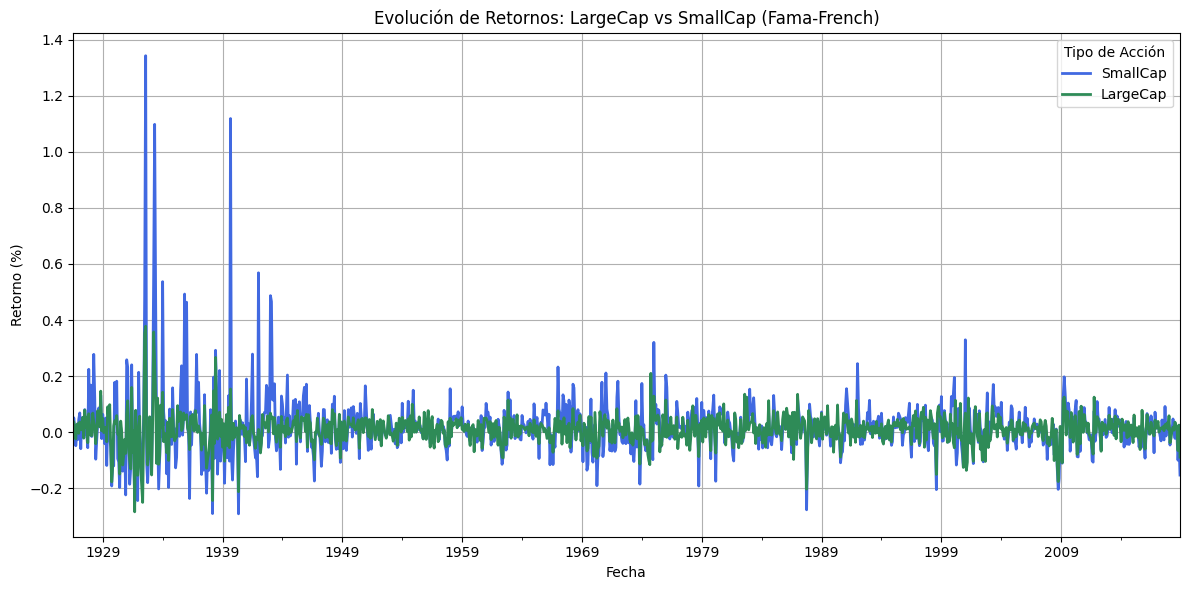

In [67]:
ax = ffrench[['SmallCap', 'LargeCap']].plot(
    figsize=(12, 6),
    linewidth=2,
    grid=True,
    title='Evolución de Retornos: LargeCap vs SmallCap (Fama-French)',
    xlabel='Fecha',
    ylabel='Retorno (%)',
    color=['royalblue', 'seagreen']
)

ax.legend(title='Tipo de Acción', loc='upper right')
plt.tight_layout()

plt.show()

3. Calcule el retorno mensual para cada portafolio de acciones

3.1. Primero debemos contar los meses de toda la data.

3.2. Calcular el retorno acumulado

3.3. Cacular el retorno mensual promedio compuesto

In [ ]:
nmeses = ffrench.shape[0] ## Número de meses
retorno_total = (1+ffrench).prod() - 1 ## .prod() multiplica todos esos factores
retorno_mensual = ((1 + retorno_total)**(1/nmeses))-1 ## Media geométrica para calcular el retorno mensual

print('Retorno mensual por portafolio:')
for col in retorno_mensual.index:
    print(f'{col}: {retorno_mensual[col]*100:.2f}% mensual')


Retorno mensual por portafolio:
SmallCap: 1.30% mensual
LargeCap: 0.74% mensual


4. Calcule el retorno anual para cada portafolio de acciones

In [ ]:
# Utilizando la fórmula con retornos mensuales
retorno_anual = ((1 + retorno_mensual)**12) - 1

print('Retorno anual por portafolio:')
for col in retorno_anual.index:
    print(f'{col}: {retorno_anual[col]*100:.2f}% anual')

Retorno anual por portafolio:
SmallCap: 16.75% anual
LargeCap: 9.28% anual


5. Calcule la volatibilidad y para después anualizarla para cada portafolio

In [ ]:
vol_mensual = ffrench.std()

vol_anual = vol_mensual * np.sqrt(12)

print('La Volatibilidad Mensual por Portafolio es:')
for col in vol_anual.index:
    print(f'{col}: {vol_anual[col]*100:.2f}% anual')

La Volatibilidad Mensual por Portafolio es:
SmallCap: 36.82% anual
LargeCap: 18.67% anual


6. Calcula el indicador ROR y el Ratio de Sharpe para cada portafolio

In [ ]:
ROR = retorno_anual / vol_anual

print('El ROR de cada Portafolio es:')
for col in ROR.index:
    print(f'{col}: {ROR[col]:.3f}')

El ROR de cada Portafolio es:
SmallCap: 0.455
LargeCap: 0.497


In [ ]:
# Suponiendo una activo libre de riesgo de 3% de rentabilidad, entonces:
risk_free_rate = 0.03

sharpe_ratio = (retorno_anual - risk_free_rate)/vol_anual

print('El Sharpe Ratio para cada Portafolio es:')
for col in sharpe_ratio.index:
    print(f'{col}: {sharpe_ratio[col]:.3f}')

El Sharpe Ratio para cada Portafolio es:
SmallCap: 0.373
LargeCap: 0.336


7. Calcula el Máximo Drawdown y grafique

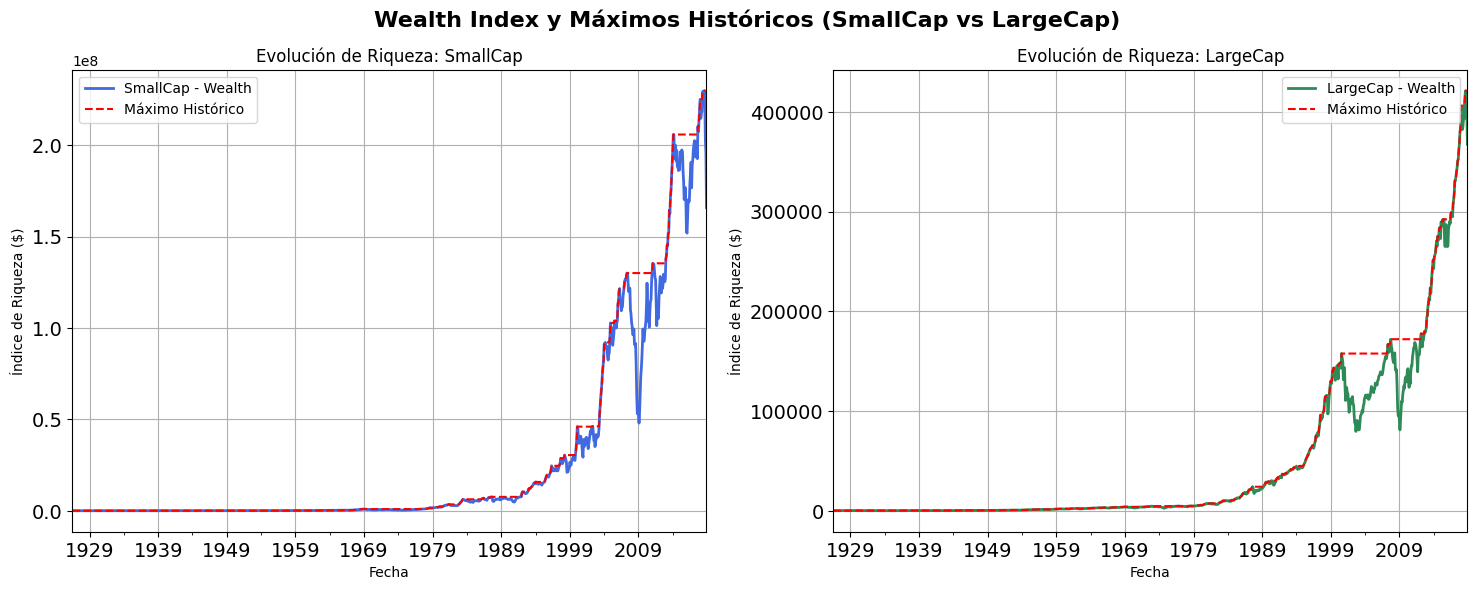

In [53]:
wealth_index = 100 * (1 + ffrench).cumprod() ## Calcular el índice de riqueza (utilizamos la función: cumprod())
previous_peaks = wealth_index.cummax() ## Calcular los peaks históricos (utilizamos la función: cunmax())

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)

# GRÁFICO PARA SMALL CAPS
wealth_index['SmallCap'].plot(title='Evolución de Riqueza: SmallCap', fontsize=14, xlabel='Fecha', ylabel='Índice de Riqueza ($)',
                              label='SmallCap - Wealth', grid=True, ax=ax[0], color='royalblue', linewidth=2, legend=True)
previous_peaks['SmallCap'].plot(label='Máximo Histórico', grid=True, ax=ax[0], color='red', linestyle='--', legend=True)

# GRÁFICO PARA LARGE CAPS
wealth_index['LargeCap'].plot(title='Evolución de Riqueza: LargeCap', fontsize=14, xlabel='Fecha', ylabel='Índice de Riqueza ($)',
                              label='LargeCap - Wealth', grid=True, ax=ax[1], color='seagreen', linewidth=2, legend=True)
previous_peaks['LargeCap'].plot(label='Máximo Histórico', grid=True, ax=ax[1], color='red', linestyle='--', legend=True)


fig.suptitle('Wealth Index y Máximos Históricos (SmallCap vs LargeCap)', fontsize=16, fontweight='bold')
plt.show()

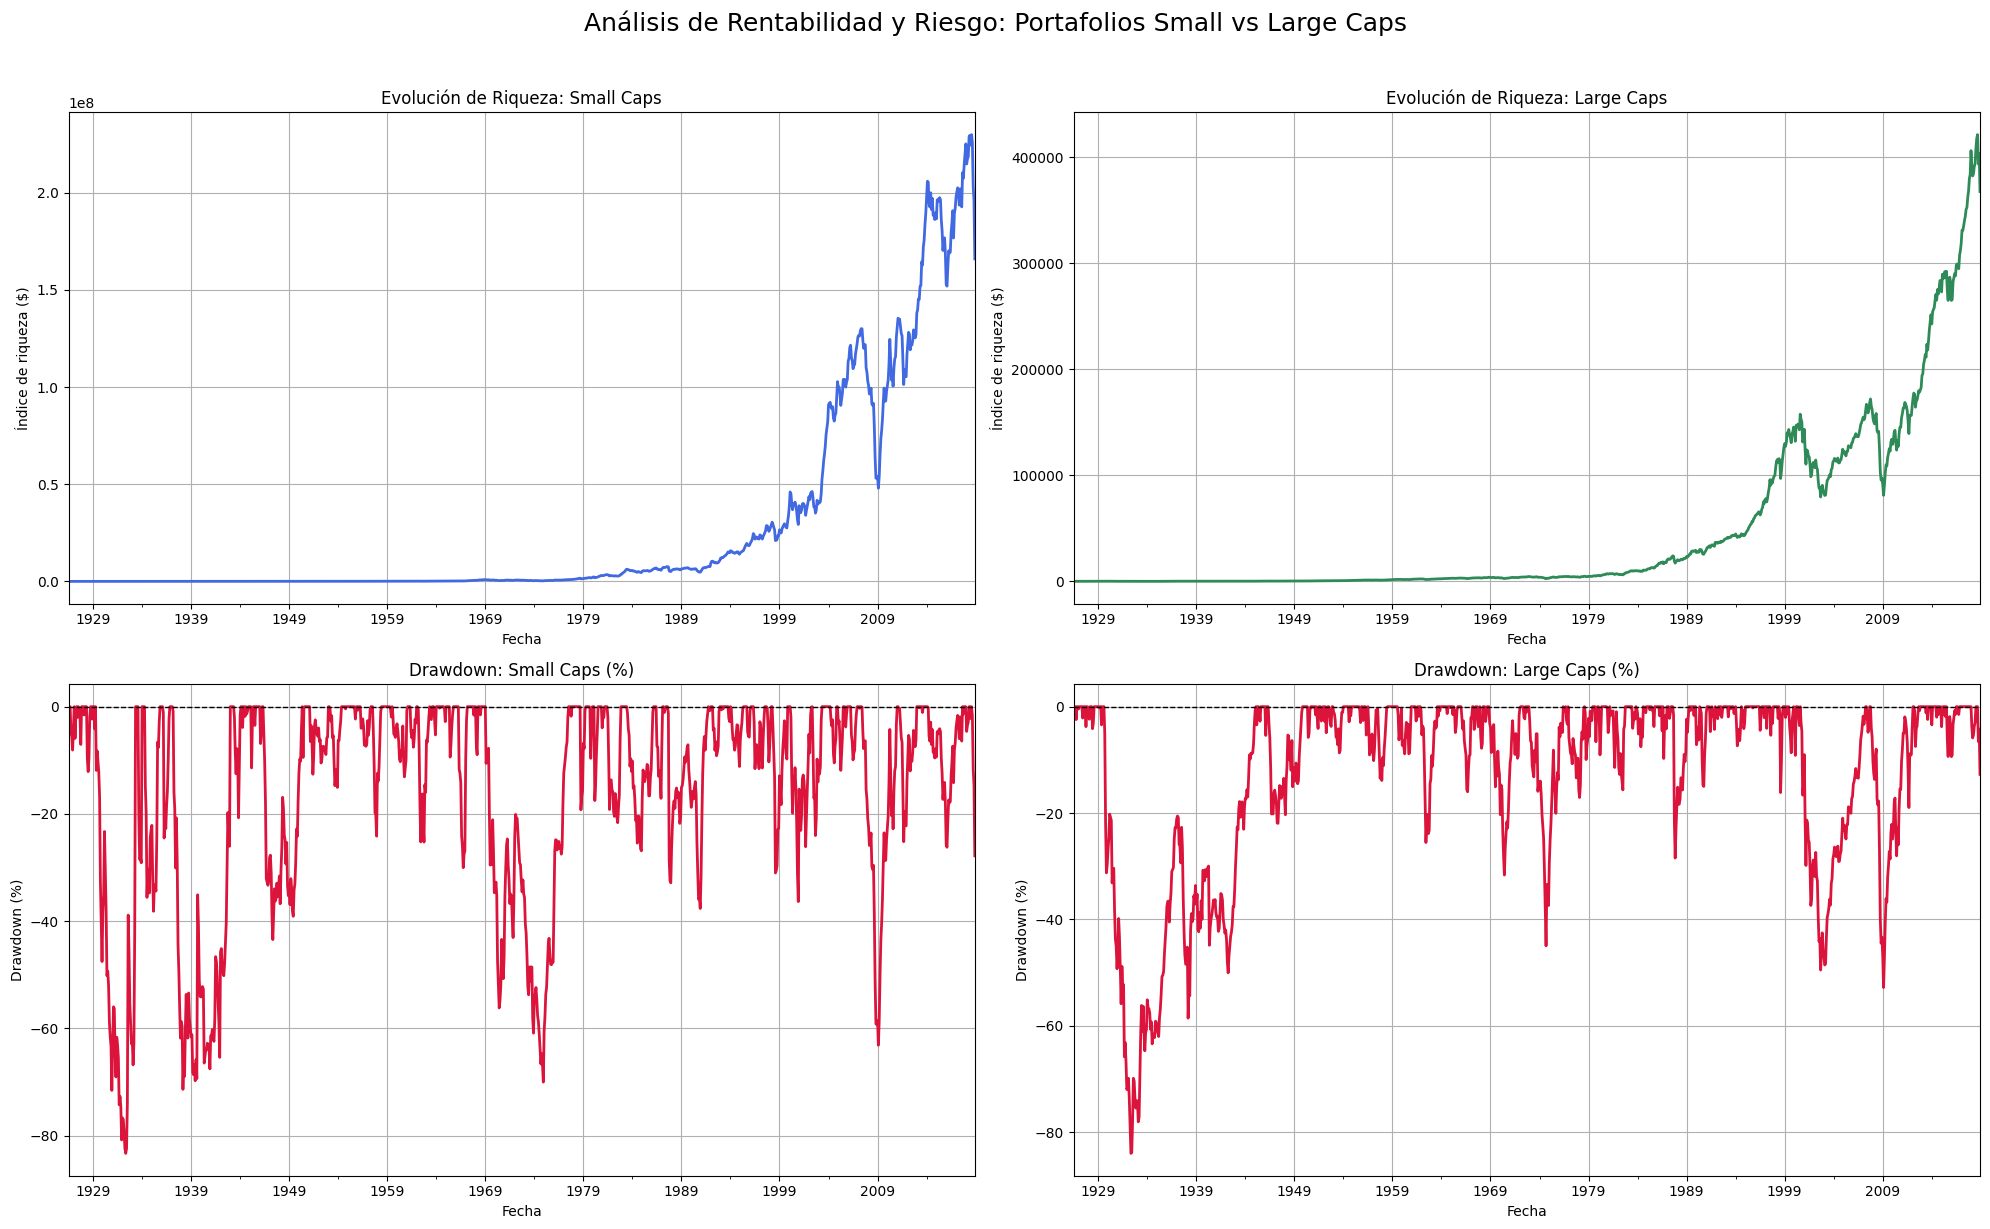

In [64]:
drawdown = (wealth_index - previous_peaks) / previous_peaks  # Calculamos el Max Drawdown para graficarlo

f, ax = plt.subplots(2, 2, figsize=(20, 12))

# --- WEALTH INDEX PLOTS ---
# Gráfico de la evolución del portafolio Small Cap
wealth_index['SmallCap'].plot(grid=True, ax=ax[0, 0], title='Evolución de Riqueza: Small Caps', color='royalblue', linewidth=2)
ax[0, 0].set_ylabel('Índice de riqueza ($)')
ax[0, 0].set_xlabel('Fecha')

# Gráfico de la evolución del portafolio Large Cap
wealth_index['LargeCap'].plot(grid=True, ax=ax[0, 1], title='Evolución de Riqueza: Large Caps', color='seagreen', linewidth=2)
ax[0, 1].set_ylabel('Índice de riqueza ($)')
ax[0, 1].set_xlabel('Fecha')

# Gráfico del drawdown de Small Caps
(drawdown['SmallCap'] * 100).plot(grid=True, ax=ax[1, 0], title='Drawdown: Small Caps (%)', color='crimson', linewidth=2)
ax[1, 0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1, 0].set_ylabel('Drawdown (%)')
ax[1, 0].set_xlabel('Fecha')

# Gráfico del drawdown de Large Caps
(drawdown['LargeCap'] * 100).plot(grid=True, ax=ax[1, 1], title='Drawdown: Large Caps (%)', color='crimson', linewidth=2)
ax[1, 1].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1, 1].set_ylabel('Drawdown (%)')
ax[1, 1].set_xlabel('Fecha')

# Ajuste final del layout
plt.suptitle('Análisis de Rentabilidad y Riesgo: Portafolios Small vs Large Caps', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

7.1. Se pueden visualizar varias crisis

In [63]:
# CRISIS DE 1929
print('\n Crisis de 1929:')
for cap in ['SmallCap', 'LargeCap']:
    min_dd = (drawdown[cap].loc[:'1935']).min().round(3) * 100
    date_dd = drawdown[cap].loc[:'1935'].idxmin()
    print(f'  - {cap}: {min_dd:.2f}% el {date_dd}')

# DOT COM CRISIS (2000 - 2002)
print('\n Crisis Dot Com (2000-2002):')
for cap in ["SmallCap", "LargeCap"]:
    min_dd = (drawdown[cap].loc['1995':'2005']).min().round(3) * 100
    date_dd = drawdown[cap].loc['1995':'2005'].idxmin()
    print(f'  - {cap}: {min_dd:.2f}% el {date_dd}')

# CRISIS FINANCIERA GLOBAL (2008)
print('\n Crisis Financiera Global (2008):')
for cap in ['SmallCap', 'LargeCap']:
    min_dd = (drawdown[cap].loc['2007':'2010']).min().round(3) * 100
    date_dd = drawdown[cap].loc['2007':'2010'].idxmin()
    print(f'  - {cap}: {min_dd:.2f}% el {date_dd}')


 Crisis de 1929:
  - SmallCap: -83.30% el 1932-05
  - LargeCap: -84.00% el 1932-05

 Crisis Dot Com (2000-2002):
  - SmallCap: -36.30% el 2000-12
  - LargeCap: -49.50% el 2002-09

 Crisis Financiera Global (2008):
  - SmallCap: -63.10% el 2009-02
  - LargeCap: -52.80% el 2009-02
